In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import ttest_ind
import sys
import os
import re

In [2]:
#read in data.csv
csv_path = "Resources/data.csv"
data_df = pd.read_csv(csv_path)

data_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
#create new row with the number of artists performing on each track

#create a new dataframe with only the "artists" column from data.csv to make it easier to work with
artist_df = pd.DataFrame(data_df['artists'])
artist_df["collaborators"] = ""

#count number of artists per track by counting the number of commas in the "artists" column for each row, then adding 1.
for index, row in artist_df.iterrows():
    row["collaborators"] = row["artists"].count(",") + 1

#join the two dataframes together and drop the duplicate "artists" column
practice2_df = data_df.join(artist_df, lsuffix="DROP").filter(regex="^(?!.*DROP)")
practice2_df



,valence,year,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists,collaborators
0,0.0594,1921,0.98200,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",3
1,0.9630,1921,0.73200,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,['Dennis Day'],1
2,0.0394,1921,0.96100,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1
3,0.1650,1921,0.96700,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,['Frank Parker'],1
4,0.2530,1921,0.95700,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,['Phil Regan'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",5
170649,0.7340,2020,0.20600,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,['Ashnikko'],1
170650,0.6370,2020,0.10100,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,['MAMAMOO'],1
170651,0.1950,2020,0.00998,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,['Eminem'],1


In [4]:
print(f'Possible number of collaborators on tracks in this dataset are: {practice2_df.collaborators.unique()}.')
#create df of all songs with only one performer
practicesolo_df = practice2_df[practice2_df.collaborators == 1]
#get number of solo songs.
print(f'The number of solo songs in the dataset is: {practicesolo_df["collaborators"].count()}.')

#create df of all duets
practiceduet_df = practice2_df[practice2_df.collaborators == 2]
#get number of duets
print(f'The number of duets in the dataset is: {practiceduet_df["collaborators"].count()}.')

#create df of all songs with 3+ collaborators
practicecollab_df = practice2_df[practice2_df.collaborators > 2]
#get number of songs with 3+ collaborators
print(f'the number of songs with three or more collaborators in the dataset is: {practicecollab_df["collaborators"].count()}.')

Possible number of collaborators on tracks in this dataset are: [3 1 2 4 5 7 6 10 15 14 8 12 9 13 11 40 16 19 18 20 22 17 27].
The number of solo songs in the dataset is: 135433.
The number of duets in the dataset is: 23535.
the number of songs with three or more collaborators in the dataset is: 11685.


In [5]:
#create dataframe of most popular 5% of songs
pop_df = practice2_df.sort_values("popularity", ascending=False)

#count the number of rows in the dataset and multiply by .05 to find out how many rows you will need in your final dataset
mostpop = ((pop_df["popularity"].count())*.05).astype(int)

#using the number generated in the previous step, take the 5% of rows with the largest "popularity" value
mostpop_df = pop_df.nlargest(mostpop, 'popularity')

#put the dataframe of the most popular 5% of songs into a csv
mostpop_df.to_csv(r'Resources\MostPopular5Percent.csv')
mostpop_df



,valence,year,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists,collaborators
19611,0.145,2020,0.4010,0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928,"['Bad Bunny', 'Jhay Cortez']",2
19606,0.756,2020,0.2210,0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989,"['24kGoldn', 'iann dior']",2
19618,0.737,2020,0.0112,0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,['BTS'],1
19608,0.357,2020,0.0194,0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073,"['Cardi B', 'Megan Thee Stallion']",2
19610,0.682,2020,0.4680,0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,['Ariana Grande'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16270,0.193,2003,0.4340,0.545,335907,0.472,0,5VUQsLff8A3ruAyCdTxqzg,0.000000,11,0.0684,-7.552,1,Who Am I,66,2003-10-07,0.0279,134.027,['Casting Crowns'],1
17900,0.771,2011,0.1370,0.392,176627,0.702,0,3xpdefOloYCBXd3UR6MVyM,0.000000,6,0.1090,-6.509,1,Turn the Lights Off,66,2011-06-21,0.0848,188.606,['Tally Hall'],1
92013,0.364,2019,0.0606,0.939,157645,0.632,1,4T2dHb8XBYHlVj7Dyo1cW9,0.001360,1,0.1010,-2.978,1,100 Racks (Offset feat. Playboi Carti),66,2019-08-16,0.1370,133.979,"['Quality Control', 'Offset', 'Playboi Carti']",3
7412,0.273,1959,0.7940,0.404,134040,0.193,0,0SsYlkXxZ5vkWOTsKxMfMz,0.000296,11,0.1030,-12.501,1,Lonesome Town,66,1959-01-01,0.0305,77.026,['Ricky Nelson'],1


In [6]:
print('For the top 5% most popular of songs in the dataset')
#getting some data about the number of collaborators on each track in my dataframe
print(f'Possible number of collaborators on tracks in this dataset are: {mostpop_df.collaborators.unique()}.')

#create df of all songs with only one performer
mostpopsolo_df = mostpop_df[mostpop_df.collaborators == 1]
#get number of solo songs.
print(f'The number of solo songs in the dataset is: {mostpopsolo_df["collaborators"].count()}.')

#create df of all duets
mostpopduet_df = mostpop_df[mostpop_df.collaborators == 2]
#get number of duets
print(f'The number of duets in the dataset is: {mostpopduet_df["collaborators"].count()}.')

#create df of all songs with 3+ collaborators
mostpopcollab_df = mostpop_df[practice2_df.collaborators > 2]
#get number of songs with 3+ collaborators
print(f'the number of songs with three or more collaborators in the dataset is: {mostpopcollab_df["collaborators"].count()}.')



For the top 5% most popular of songs in the dataset
Possible number of collaborators on tracks in this dataset are: [2 1 3 4 5 7 6 8 9 10 40].
The number of solo songs in the dataset is: 6187.
The number of duets in the dataset is: 1705.
the number of songs with three or more collaborators in the dataset is: 640.


C:\Users\kelly\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [7]:
#create a dataframe of the mean values for all audio qualities in the most popular 5% dataset
mostpop_info_df = pd.DataFrame(mostpop_df.mean())
mostpop_info_df

,0
valence,0.504227
year,2010.031294
acousticness,0.252493
danceability,0.632455
duration_ms,217580.772035
energy,0.627107
explicit,0.299930
instrumentalness,0.034390
key,5.207806
liveness,0.180101


In [8]:
#create a dataframe with the mean values for all audio qualities for all songs in the original dataset
data_info_df = pd.DataFrame(data_df.mean())
data_info_df

,0
valence,0.528587
year,1976.787241
acousticness,0.502115
danceability,0.537396
duration_ms,230948.310666
energy,0.482389
explicit,0.084575
instrumentalness,0.167010
key,5.199844
liveness,0.205839


In [9]:
#create a dataframe of the mean values for all audio qualities in all solo songs in the dataset
solo_info_df = pd.DataFrame(practicesolo_df.mean())
solo_info_df

,0
valence,0.549274
year,1978.774398
acousticness,0.457578
danceability,0.546177
duration_ms,226593.925631
energy,0.512569
explicit,0.076171
instrumentalness,0.139559
key,5.209321
liveness,0.205541


In [10]:
#create a dataframe of the mean values for all audio qualities for all duets in the dataset
duet_info_df = pd.DataFrame(practiceduet_df.mean())
duet_info_df

,0
valence,0.489564
year,1969.551434
acousticness,0.645750
danceability,0.534998
duration_ms,228989.015381
energy,0.384458
explicit,0.116337
instrumentalness,0.273945
key,5.205184
liveness,0.202303


In [11]:
#create a dataframe of the mean values for all audio qualities for all collaborations in the dataset
collab_info_df = pd.DataFrame(practicecollab_df.mean())
collab_info_df

,0
valence,0.367417
year,1968.329226
acousticness,0.729014
danceability,0.440443
duration_ms,285363.325032
energy,0.329836
explicit,0.118015
instrumentalness,0.269787
key,5.079247
liveness,0.216413


In [12]:
#create a dataframe of the mean values for all audio qualities for solo songs in the most popular 5% dataset
mostpopsolo_info_df = pd.DataFrame(mostpopsolo_df.mean())
mostpopsolo_info_df

,0
valence,0.503709
year,2007.979473
acousticness,0.265821
danceability,0.610507
duration_ms,218523.918862
energy,0.622398
explicit,0.228867
instrumentalness,0.041116
key,5.176014
liveness,0.179010


In [13]:
#create a dataframe of the mean values for all audio qualities in the duets in the most popular 5% dataset
mostpopduet_info_df = pd.DataFrame(mostpopduet_df.mean())
mostpopduet_info_df

,0
valence,0.504328
year,2015.292082
acousticness,0.227680
danceability,0.689458
duration_ms,211258.515543
energy,0.633194
explicit,0.467449
instrumentalness,0.015899
key,5.317302
liveness,0.180423


In [14]:
#create a dataframe of the mean values for all audio qualities in the collaborations in the most popular 5% dataset
mostpopcollab_info_df = pd.DataFrame(mostpopcollab_df.mean())
mostpopcollab_info_df

,0
valence,0.508965
year,2015.851562
acousticness,0.189760
danceability,0.692770
duration_ms,225306.081250
energy,0.656408
explicit,0.540625
instrumentalness,0.018636
key,5.223438
liveness,0.189792


In [15]:
#for ease of viewing, combine all previous dataframes into a single dataframe
data_info_df.rename(columns={0:"Mean Value for All Songs"}).reset_index()
Mean_Values = data_info_df.join(mostpop_info_df, lsuffix="Mean Value for All Songs").rename(columns={"0Mean Value for All Songs":"Mean Value for All Songs", "0":"Mean Value for Top 5% of Songs"})
Mean_Values = Mean_Values.join(solo_info_df).rename(columns={0:"Mean Value for All Solos"})
Mean_Values = Mean_Values.join(mostpopsolo_info_df).rename(columns={0:"Mean Value for Top 5% of Solos"})
Mean_Values = Mean_Values.join(duet_info_df).rename(columns={0:"Mean Value for All Duets"})
Mean_Values = Mean_Values.join(mostpopduet_info_df).rename(columns={0:"Mean Value for Top 5% of Duets"})
Mean_Values = Mean_Values.join(collab_info_df).rename(columns={0:"Mean Value for All Collabs"})
Mean_Values = Mean_Values.join(mostpopcollab_info_df).rename(columns={0:"Mean Value for Top 5% of Collabs"})
Mean_Values



,Mean Value for All Songs,Mean Value for Top 5% of Songs,Mean Value for All Solos,Mean Value for Top 5% of Solos,Mean Value for All Duets,Mean Value for Top 5% of Duets,Mean Value for All Collabs,Mean Value for Top 5% of Collabs
valence,0.528587,0.504227,0.549274,0.503709,0.489564,0.504328,0.367417,0.508965
year,1976.787241,2010.031294,1978.774398,2007.979473,1969.551434,2015.292082,1968.329226,2015.851562
acousticness,0.502115,0.252493,0.457578,0.265821,0.645750,0.227680,0.729014,0.189760
danceability,0.537396,0.632455,0.546177,0.610507,0.534998,0.689458,0.440443,0.692770
duration_ms,230948.310666,217580.772035,226593.925631,218523.918862,228989.015381,211258.515543,285363.325032,225306.081250
energy,0.482389,0.627107,0.512569,0.622398,0.384458,0.633194,0.329836,0.656408
explicit,0.084575,0.299930,0.076171,0.228867,0.116337,0.467449,0.118015,0.540625
instrumentalness,0.167010,0.034390,0.139559,0.041116,0.273945,0.015899,0.269787,0.018636
key,5.199844,5.207806,5.209321,5.176014,5.205184,5.317302,5.079247,5.223438
liveness,0.205839,0.180101,0.205541,0.179010,0.202303,0.180423,0.216413,0.189792


In [16]:
#set up variables for upcoming visualizations based on the above chart
Mean_Values_Valence = Mean_Values.iloc[[0],:]
Mean_Values_Acousticness = Mean_Values.iloc[[2],:]
Mean_Values_Danceability = Mean_Values.iloc[[3],:]
Mean_Values_Duration = Mean_Values.iloc[[4],:]
Mean_Values_Energy = Mean_Values.iloc[[5],:]
Mean_Values_Instrumentalness = Mean_Values.iloc[[7],:]
Mean_Values_Liveness = Mean_Values.iloc[[9],:]
Mean_Values_Loudness = Mean_Values.iloc[[10],:]
Mean_Values_Speechiness = Mean_Values.iloc[[13],:]
Mean_Values_Tempo = Mean_Values.iloc[[14],:]

#create function for building visualizations
def groupbar():
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

In [17]:
#create function for running statistical analysis to go with each visualization below and to prepare to create a dataframe 
    #of statistical information later
col1 = []
col2 = []
def statanalysis():
    "-----"
    question = (f'T-Test for mean {x} of all songs vs. mean {x} of top 5% of all songs:')
    print(question)
    result = (stats.ttest_ind(practice2_df[x], mostpop_df[x], equal_var=False))
    print(result)
    col1.append(question)
    col2.append(result)
    "-----"
    question = (f'T-Test for mean {x} of all solo songs vs. mean {x} of top 5% of all solo songs:')
    print(question)
    result = (stats.ttest_ind(practicesolo_df[x], mostpopsolo_df[x], equal_var=False))
    print(result)
    col1.append(question)
    col2.append(result)
    "-----"
    question = (f'T-Test for mean {x} of all duets vs. mean {x} of top 5% of all duets:')
    print(question)
    result = (stats.ttest_ind(practiceduet_df[x], mostpopduet_df[x], equal_var=False))
    print(result)
    col1.append(question)
    col2.append(result)
    "-----"
    question = (f'T-Test for mean {x} of all collabs vs. mean {x} of top 5% of all collabs:')
    print(question)
    result = (stats.ttest_ind(practicecollab_df[x], mostpopcollab_df[x], equal_var=False))
    print(result)
    col1.append(question)
    col2.append(result)
    "-----"

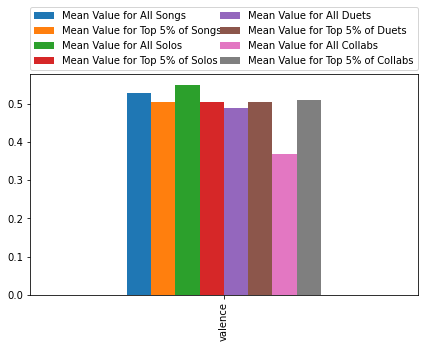

T-Test for mean valence of all songs vs. mean valence of top 5% of all songs:
Ttest_indResult(statistic=9.152369769773115, pvalue=6.708651043296469e-20)
T-Test for mean valence of all solo songs vs. mean valence of top 5% of all solo songs:
Ttest_indResult(statistic=14.322951506589463, pvalue=7.24248933852216e-46)
T-Test for mean valence of all duets vs. mean valence of top 5% of all duets:
Ttest_indResult(statistic=-2.6080976361627726, pvalue=0.009169511483149274)
T-Test for mean valence of all collabs vs. mean valence of top 5% of all collabs:
Ttest_indResult(statistic=-15.150006947758197, pvalue=2.4339715817432287e-45)


In [18]:
#plot and analyze valence
Mean_Values_Valence_plot = Mean_Values_Valence.plot.bar(rot=0)
groupbar()
Mean_Values_Valence.T.sort_values("valence")
x = "valence"
statanalysis()

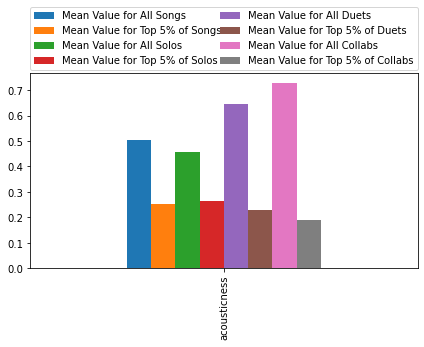

T-Test for mean acousticness of all songs vs. mean acousticness of top 5% of all songs:
Ttest_indResult(statistic=81.50413657507832, pvalue=0.0)
T-Test for mean acousticness of all solo songs vs. mean acousticness of top 5% of all solo songs:
Ttest_indResult(statistic=51.50985742109722, pvalue=0.0)
T-Test for mean acousticness of all duets vs. mean acousticness of top 5% of all duets:
Ttest_indResult(statistic=66.42811894365396, pvalue=0.0)
T-Test for mean acousticness of all collabs vs. mean acousticness of top 5% of all collabs:
Ttest_indResult(statistic=61.603500175496336, pvalue=1.70168233e-315)


In [19]:
#plot and analyze acousticness
Mean_Values_Acousticness_plot = Mean_Values_Acousticness.plot.bar(rot=0)
groupbar()
Mean_Values_Acousticness.T.sort_values("acousticness")
x = "acousticness"
statanalysis()

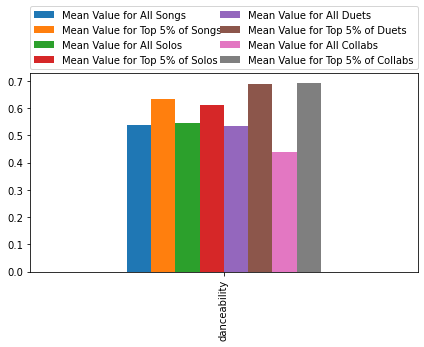

T-Test for mean danceability of all songs vs. mean danceability of top 5% of all songs:
Ttest_indResult(statistic=-52.60460942916747, pvalue=0.0)
T-Test for mean danceability of all solo songs vs. mean danceability of top 5% of all solo songs:
Ttest_indResult(statistic=-30.384783425533794, pvalue=2.8899054325690307e-190)
T-Test for mean danceability of all duets vs. mean danceability of top 5% of all duets:
Ttest_indResult(statistic=-42.42641013967331, pvalue=3.0779727984655376e-287)
T-Test for mean danceability of all collabs vs. mean danceability of top 5% of all collabs:
Ttest_indResult(statistic=-38.57059548244426, pvalue=4.58300516439481e-182)


In [20]:
#plot and analyze danceability
Mean_Values_Danceability_plot = Mean_Values_Danceability.plot.bar(rot=0)
groupbar()
Mean_Values_Danceability.T.sort_values("danceability")
x = "danceability"
statanalysis()

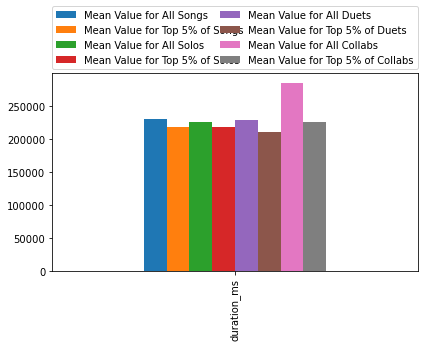

T-Test for mean duration_ms of all songs vs. mean duration_ms of top 5% of all songs:
Ttest_indResult(statistic=19.6747562170576, pvalue=5.646777205145274e-85)
T-Test for mean duration_ms of all solo songs vs. mean duration_ms of top 5% of all solo songs:
Ttest_indResult(statistic=10.12112486488086, pvalue=6.028401490958723e-24)
T-Test for mean duration_ms of all duets vs. mean duration_ms of top 5% of all duets:
Ttest_indResult(statistic=12.905301841386455, pvalue=2.594393367412854e-37)
T-Test for mean duration_ms of all collabs vs. mean duration_ms of top 5% of all collabs:
Ttest_indResult(statistic=19.23439324864583, pvalue=9.76428494538968e-74)


In [21]:
#plot and analyze duration
Mean_Values_Duration_plot = Mean_Values_Duration.plot.bar(rot=0)
groupbar()
Mean_Values_Duration.T.sort_values("duration_ms")
x = "duration_ms"
statanalysis()

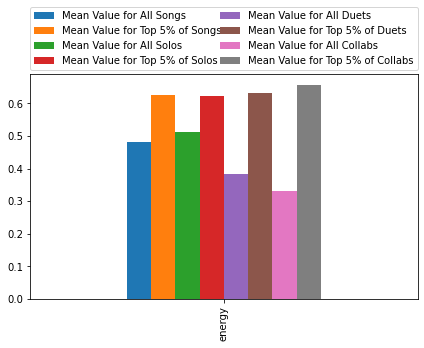

T-Test for mean energy of all songs vs. mean energy of top 5% of all songs:
Ttest_indResult(statistic=-63.99567278716711, pvalue=0.0)
T-Test for mean energy of all solo songs vs. mean energy of top 5% of all solo songs:
Ttest_indResult(statistic=-39.698314152277554, pvalue=0.0)
T-Test for mean energy of all duets vs. mean energy of top 5% of all duets:
Ttest_indResult(statistic=-55.10971770442502, pvalue=0.0)
T-Test for mean energy of all collabs vs. mean energy of top 5% of all collabs:
Ttest_indResult(statistic=-48.292040272461115, pvalue=2.433177570467904e-242)


In [22]:
#plot and analyze energy
Mean_Values_Energy_plot = Mean_Values_Energy.plot.bar(rot=0)
groupbar()
Mean_Values_Energy.T.sort_values("energy")
x = "energy"
statanalysis()

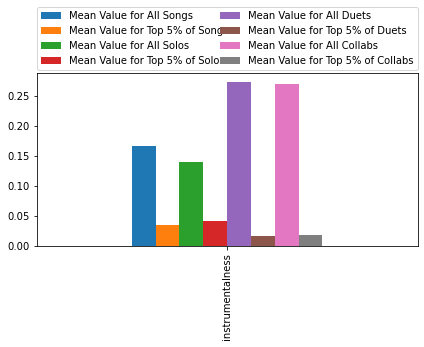

T-Test for mean energy of all songs vs. mean energy of top 5% of all songs:
Ttest_indResult(statistic=-63.99567278716711, pvalue=0.0)
T-Test for mean energy of all solo songs vs. mean energy of top 5% of all solo songs:
Ttest_indResult(statistic=-39.698314152277554, pvalue=0.0)
T-Test for mean energy of all duets vs. mean energy of top 5% of all duets:
Ttest_indResult(statistic=-55.10971770442502, pvalue=0.0)
T-Test for mean energy of all collabs vs. mean energy of top 5% of all collabs:
Ttest_indResult(statistic=-48.292040272461115, pvalue=2.433177570467904e-242)


In [23]:
#plot and analyze instrumentalness
Mean_Values_Instrumentalness_plot = Mean_Values_Instrumentalness.plot.bar(rot=0)
groupbar()
Mean_Values_Instrumentalness.T.sort_values("instrumentalness")
x = "energy"
statanalysis()

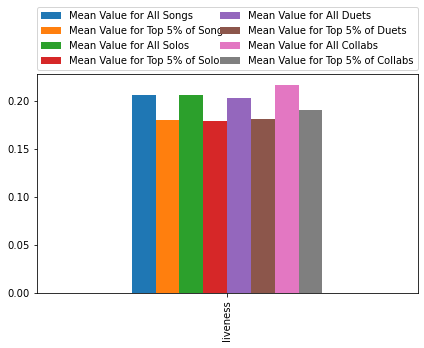

T-Test for mean liveness of all songs vs. mean liveness of top 5% of all songs:
Ttest_indResult(statistic=15.855709342970536, pvalue=6.327055155609927e-56)
T-Test for mean liveness of all solo songs vs. mean liveness of top 5% of all solo songs:
Ttest_indResult(statistic=13.804976990480062, pvalue=8.571923949316716e-43)
T-Test for mean liveness of all duets vs. mean liveness of top 5% of all duets:
Ttest_indResult(statistic=6.243158072067981, pvalue=5.183771547921149e-10)
T-Test for mean liveness of all collabs vs. mean liveness of top 5% of all collabs:
Ttest_indResult(statistic=4.411896817915704, pvalue=1.1762065785609628e-05)


In [24]:
#plot and analyze liveness
Mean_Values_Liveness_plot = Mean_Values_Liveness.plot.bar(rot=0)
groupbar()
Mean_Values_Liveness.T.sort_values("liveness")
x = "liveness"
statanalysis()

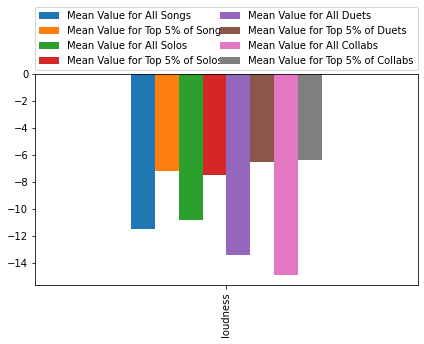

T-Test for mean loudness of all songs vs. mean loudness of top 5% of all songs:
Ttest_indResult(statistic=-97.40742772727299, pvalue=0.0)
T-Test for mean loudness of all solo songs vs. mean loudness of top 5% of all solo songs:
Ttest_indResult(statistic=-63.01720486780716, pvalue=0.0)
T-Test for mean loudness of all duets vs. mean loudness of top 5% of all duets:
Ttest_indResult(statistic=-78.39564756853603, pvalue=0.0)
T-Test for mean loudness of all collabs vs. mean loudness of top 5% of all collabs:
Ttest_indResult(statistic=-60.32246914110597, pvalue=0.0)


In [25]:
#plot and analyze loudness
Mean_Values_Loudness_plot = Mean_Values_Loudness.plot.bar(rot=0)
groupbar()
Mean_Values_Loudness.T.sort_values("loudness")
x = "loudness"
statanalysis()

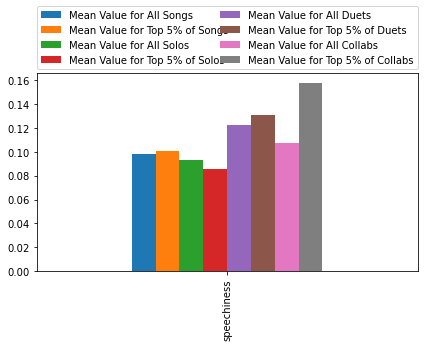

T-Test for mean speechiness of all songs vs. mean speechiness of top 5% of all songs:
Ttest_indResult(statistic=-1.5644229050254388, pvalue=0.11774767770250474)
T-Test for mean speechiness of all solo songs vs. mean speechiness of top 5% of all solo songs:
Ttest_indResult(statistic=6.035535677736953, pvalue=1.6557069655517964e-09)
T-Test for mean speechiness of all duets vs. mean speechiness of top 5% of all duets:
Ttest_indResult(statistic=-2.7329853911662574, pvalue=0.006321727104319265)
T-Test for mean speechiness of all collabs vs. mean speechiness of top 5% of all collabs:
Ttest_indResult(statistic=-9.771450525319294, pvalue=2.6275240946894514e-21)


In [26]:
#plot and analyze speechiness
Mean_Values_Speechiness_plot = Mean_Values_Speechiness.plot.bar(rot=0)
groupbar()
Mean_Values_Speechiness.T.sort_values("speechiness")
x = "speechiness"
statanalysis()

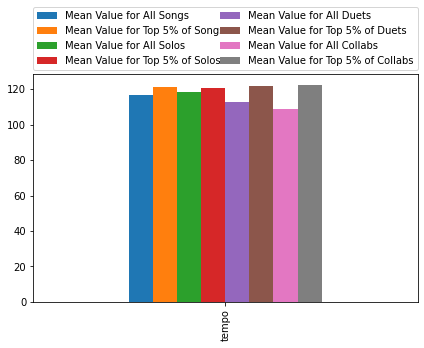

T-Test for mean tempo of all songs vs. mean tempo of top 5% of all songs:
Ttest_indResult(statistic=-12.722212937977245, pvalue=8.91438401666535e-37)
T-Test for mean tempo of all solo songs vs. mean tempo of top 5% of all solo songs:
Ttest_indResult(statistic=-6.636054836615883, pvalue=3.47087140460003e-11)
T-Test for mean tempo of all duets vs. mean tempo of top 5% of all duets:
Ttest_indResult(statistic=-12.093304186618019, pvalue=1.54665983148737e-32)
T-Test for mean tempo of all collabs vs. mean tempo of top 5% of all collabs:
Ttest_indResult(statistic=-10.290869033707512, pvalue=3.118791156162404e-23)


In [27]:
#plot and analyze tempo
Mean_Values_Tempo_plot = Mean_Values_Tempo.plot.bar(rot=0)
groupbar()
Mean_Values_Tempo.T.sort_values("tempo")
x = "tempo"
statanalysis()

In [36]:
#create dataframe of statistical analyses from above
pd.set_option('display.max_colwidth', None)
stats_df = pd.DataFrame(col1).rename(columns = {0:"Test"})

stats_df["Statistic"] = col2
stats_df.to_csv(r'Resources\stats.csv')
csv_path = "Resources/stats.csv"
stats2_df = pd.read_csv(csv_path)
stats2_df[['Statistic','PValue']] = stats2_df.Statistic.str.split(",",expand=True) 
stats2_df['Test'] = stats2_df['Test'].str.split('for',1).str[1]
stats2_df['Statistic'] = stats2_df['Statistic'].str.split('=').str[1]
stats2_df['PValue'] = stats2_df['PValue'].str.split('=').str[1]
stats2_df['PValue'] = stats2_df['PValue'].str.split(')').str[0]
stats2_df = stats2_df.drop(['Unnamed: 0'], axis=1)
stats2_df['Statistic'] = pd.to_numeric(stats2_df['Statistic'], errors='coerce')
stats2_df['PValue'] = pd.to_numeric(stats2_df['PValue'], errors='coerce')
stats2_df = stats2_df.round(7)
insignificant_df = stats2_df[stats2_df['PValue'] > .05]
significant_df = stats2_df[stats2_df['PValue'] < .05]

In [37]:
#create dataframe of tests which resulted in statistically insignificant data
print("For each test, the null hypothesis is that the quality being compared between the relevant 'all songs'")
print("and 'top 5% of songs' values within a category is irrelevant to the song's popularity.")
print("-----")
print('We must accept the null hypotheses for the following tests:')
insignificant_df

For each test, the null hypothesis is that the quality being compared between the relevant 'all songs'
and 'top 5% of songs' values within a category is irrelevant to the song's popularity.
-----
We must accept the null hypotheses for the following tests:


,Test,Statistic,PValue
32,mean speechiness of all songs vs. mean speechiness of top 5% of all songs:,-1.564423,0.117748


In [38]:
#create dataframe of statistically significant data
pd.set_option('display.max_colwidth', None)
print('We must reject the null hypotheses for the following tests:')
significant_df

We must reject the null hypotheses for the following tests:


,Test,Statistic,PValue
0,mean valence of all songs vs. mean valence of top 5% of all songs:,9.152370,0.000000
1,mean valence of all solo songs vs. mean valence of top 5% of all solo songs:,14.322952,0.000000
2,mean valence of all duets vs. mean valence of top 5% of all duets:,-2.608098,0.009170
3,mean valence of all collabs vs. mean valence of top 5% of all collabs:,-15.150007,0.000000
4,mean acousticness of all songs vs. mean acousticness of top 5% of all songs:,81.504137,0.000000
5,mean acousticness of all solo songs vs. mean acousticness of top 5% of all solo songs:,51.509857,0.000000
6,mean acousticness of all duets vs. mean acousticness of top 5% of all duets:,66.428119,0.000000
7,mean acousticness of all collabs vs. mean acousticness of top 5% of all collabs:,61.603500,0.000000
8,mean danceability of all songs vs. mean danceability of top 5% of all songs:,-52.604609,0.000000
9,mean danceability of all solo songs vs. mean danceability of top 5% of all solo songs:,-30.384783,0.000000


In [39]:
#create dataframe of statistically significant data looking at characteristics of all songs in the dataset vs the top 5%
significant_allsongs_df = significant_df[~significant_df.Test.str.contains("all songs") == False]
significant_allsongs_df

,Test,Statistic,PValue
0,mean valence of all songs vs. mean valence of top 5% of all songs:,9.152370,0.0
4,mean acousticness of all songs vs. mean acousticness of top 5% of all songs:,81.504137,0.0
8,mean danceability of all songs vs. mean danceability of top 5% of all songs:,-52.604609,0.0
12,mean duration_ms of all songs vs. mean duration_ms of top 5% of all songs:,19.674756,0.0
16,mean energy of all songs vs. mean energy of top 5% of all songs:,-63.995673,0.0
20,mean energy of all songs vs. mean energy of top 5% of all songs:,-63.995673,0.0
24,mean liveness of all songs vs. mean liveness of top 5% of all songs:,15.855709,0.0
28,mean loudness of all songs vs. mean loudness of top 5% of all songs:,-97.407428,0.0
36,mean tempo of all songs vs. mean tempo of top 5% of all songs:,-12.722213,0.0


In [40]:
#create dataframe of statistically significant data looking at characteristics of solo songs in the dataset vs the top 5%
significant_solo_df = significant_df[~significant_df.Test.str.contains("solo") == False]
significant_solo_df

,Test,Statistic,PValue
1,mean valence of all solo songs vs. mean valence of top 5% of all solo songs:,14.322952,0.0
5,mean acousticness of all solo songs vs. mean acousticness of top 5% of all solo songs:,51.509857,0.0
9,mean danceability of all solo songs vs. mean danceability of top 5% of all solo songs:,-30.384783,0.0
13,mean duration_ms of all solo songs vs. mean duration_ms of top 5% of all solo songs:,10.121125,0.0
17,mean energy of all solo songs vs. mean energy of top 5% of all solo songs:,-39.698314,0.0
21,mean energy of all solo songs vs. mean energy of top 5% of all solo songs:,-39.698314,0.0
25,mean liveness of all solo songs vs. mean liveness of top 5% of all solo songs:,13.804977,0.0
29,mean loudness of all solo songs vs. mean loudness of top 5% of all solo songs:,-63.017205,0.0
33,mean speechiness of all solo songs vs. mean speechiness of top 5% of all solo songs:,6.035536,0.0
37,mean tempo of all solo songs vs. mean tempo of top 5% of all solo songs:,-6.636055,0.0


In [41]:
#create dataframe of statistically significant data looking at characteristics of duets in the dataset vs the top 5%
significant_duet_df = significant_df[~significant_df.Test.str.contains("duets") == False]
significant_duet_df

,Test,Statistic,PValue
2,mean valence of all duets vs. mean valence of top 5% of all duets:,-2.608098,0.009170
6,mean acousticness of all duets vs. mean acousticness of top 5% of all duets:,66.428119,0.000000
10,mean danceability of all duets vs. mean danceability of top 5% of all duets:,-42.426410,0.000000
14,mean duration_ms of all duets vs. mean duration_ms of top 5% of all duets:,12.905302,0.000000
18,mean energy of all duets vs. mean energy of top 5% of all duets:,-55.109718,0.000000
22,mean energy of all duets vs. mean energy of top 5% of all duets:,-55.109718,0.000000
26,mean liveness of all duets vs. mean liveness of top 5% of all duets:,6.243158,0.000000
30,mean loudness of all duets vs. mean loudness of top 5% of all duets:,-78.395648,0.000000
34,mean speechiness of all duets vs. mean speechiness of top 5% of all duets:,-2.732985,0.006322
38,mean tempo of all duets vs. mean tempo of top 5% of all duets:,-12.093304,0.000000


In [42]:
#create dataframe of statistically significant data looking at characteristics of collabs in the dataset vs the top 5%
significant_collab_df = significant_df[~significant_df.Test.str.contains("collab") == False]
significant_collab_df

,Test,Statistic,PValue
3,mean valence of all collabs vs. mean valence of top 5% of all collabs:,-15.150007,0.000000
7,mean acousticness of all collabs vs. mean acousticness of top 5% of all collabs:,61.603500,0.000000
11,mean danceability of all collabs vs. mean danceability of top 5% of all collabs:,-38.570596,0.000000
15,mean duration_ms of all collabs vs. mean duration_ms of top 5% of all collabs:,19.234393,0.000000
19,mean energy of all collabs vs. mean energy of top 5% of all collabs:,-48.292040,0.000000
23,mean energy of all collabs vs. mean energy of top 5% of all collabs:,-48.292040,0.000000
27,mean liveness of all collabs vs. mean liveness of top 5% of all collabs:,4.411897,0.000012
31,mean loudness of all collabs vs. mean loudness of top 5% of all collabs:,-60.322469,0.000000
35,mean speechiness of all collabs vs. mean speechiness of top 5% of all collabs:,-9.771451,0.000000
39,mean tempo of all collabs vs. mean tempo of top 5% of all collabs:,-10.290869,0.000000
